This notebook generates the solution to the Burger's equation using the finite difference method. 

The Burger's equation is a non-linear partial differential equation that describes the behavior of inviscid fluid flow. The equation is given by:

\begin{align}
u^n+\Delta t \mu^{n-1} \frac{d}{d x} u^n-\nu \Delta t \frac{d^2}{d x^2} u^n=u^{n-1}
\end{align}

In [1]:
import jax.numpy as jnp
import jax.random as jr
import jax.numpy as jnp
import gpjax as gpx
from jax import jit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import fsolve

from jax import config
config.update("jax_enable_x64", True)

In [2]:
# implement constant spacing
x = np.linspace(-1, 1, 1000)

In [3]:
# parameters for the equation
nu = 0.01/(np.pi)
dt = 0.001

In [4]:
def burger_equation_RHS(u, nu):
    u_x = np.gradient(u, x)
    u_xx = np.gradient(np.gradient(u, x), x)
    f = -u * u_x + nu * u_xx

    # the threshold for preventing the divergence of the solution, should be tuned for different problems
    threshold = 5 
    for i in range(len(f)):
        if np.isnan(f[i]) or np.abs(f[i]) > threshold:
            # If the value exceeds the threshold or is NaN
            # Replace it with the average of its neighboring values if available
            if i > 0 and i < len(f) - 1:
                f[i] = (f[i-1] + f[i+1]) / 2
            elif i > 0:
                f[i] = f[i-1] 
            elif i < len(f) - 1:
                f[i] = f[i+1]
    
    
    return f

In [5]:
# initial condition
u0 = np.array([np.sin(-np.pi * x)])

In [6]:
# use ODE solver
from ODE import ODE_solver
from functools import partial

In [7]:
solver = ODE_solver()

# define the time array
t = np.arange(0, 1, dt)

# select one of the following methods: 
u = solver.Runge_Kutta(partial(burger_equation_RHS, nu=nu), u0, t)
# u = solver.backward_euler(partial(burger_equation_RHS, nu=nu), u0, t)
# u = solver.forward_euler(partial(burger_equation_RHS, nu=nu), u0, t)
# u = solver.backward_euler(partial(burger_equation_RHS, nu=nu), u0, t)

u = jnp.array(u)

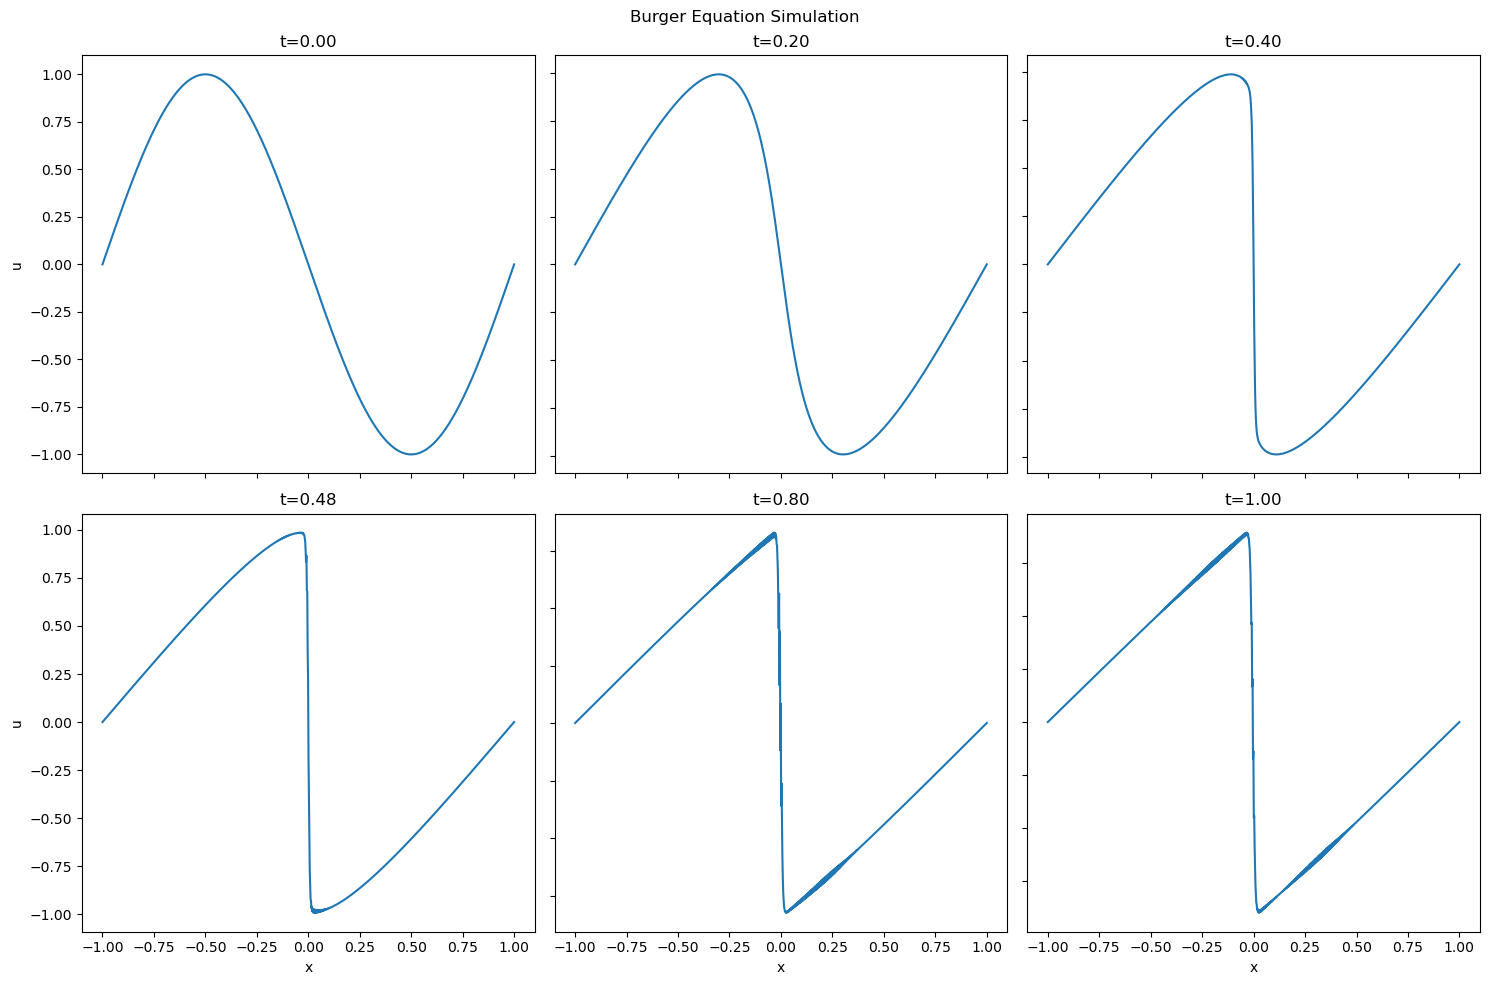

In [8]:
#create subplots
t_list = [0, 0.2, 0.4, 0.478, 0.8, 1.0]
t_list = [int(t/dt) for t in t_list]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Burger Equation Simulation')
for i, t in enumerate(t_list):
    axs[i//3, i%3].plot(x, u[t])
    axs[i//3, i%3].set_title(f"t={t*0.001:.2f}")
#set x and y labels
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='u')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.tight_layout()
plt.savefig("../../result/burger_equation_simulation.png")
plt.show()

In [9]:
#save the data into a json file
import json
with open('../../testdata/burger_eqn.json','w') as f:
    json.dump({'x': x.tolist(), 'u': u.tolist()}, f)


Test if the solution is saved and sense check the solution by plotting the solution at different time steps.

In [10]:
#read from the json file
with open('../../testdata/burger_eqn.json','r') as f:
    data = json.load(f)
    x_new = jnp.array(data['x'])
    u_new = jnp.array(data['u'])


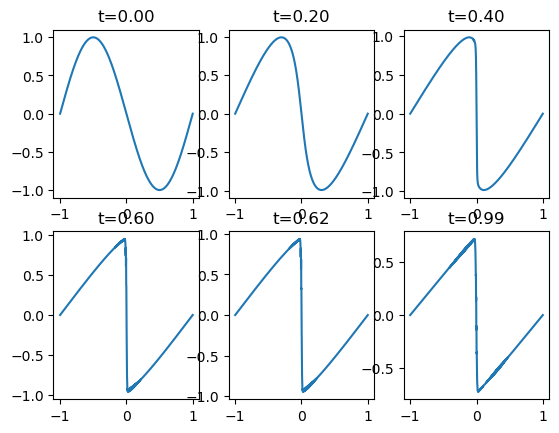

In [11]:
#create subplots
t_list = [0, 0.2, 0.4, 0.6, 0.62, 0.99]
t_list = [int(t/dt) for t in t_list]

fig, axs = plt.subplots(2, 3)
for i, t in enumerate(t_list):
    axs[i//3, i%3].plot(x_new, u_new[t])
    axs[i//3, i%3].set_title(f"t={t*0.001:.2f}")